In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import logging
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import svm

D:\Anaconda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\mle_tf\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
#read csv file
all_df = pd.read_csv('D:/Machine Learning/PRSA_data_2010.1.1-2014.12.31.csv', index_col=False)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# all_df.drop('No',axis=1,inplace=True)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
all_df.count() # use to compare if the missing data is removed successfully

No       43824
year     43824
month    43824
day      43824
hour     43824
pm2.5    41757
DEWP     43824
TEMP     43824
PRES     43824
cbwd     43824
Iws      43824
Is       43824
Ir       43824
dtype: int64

In [5]:
#remove missing data
all_df.dropna(inplace=True)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [6]:
all_df.count()

No       41757
year     41757
month    41757
day      41757
hour     41757
pm2.5    41757
DEWP     41757
TEMP     41757
PRES     41757
cbwd     41757
Iws      41757
Is       41757
Ir       41757
dtype: int64

D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

D:\Anaconda\envs\mle_tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\mle_tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


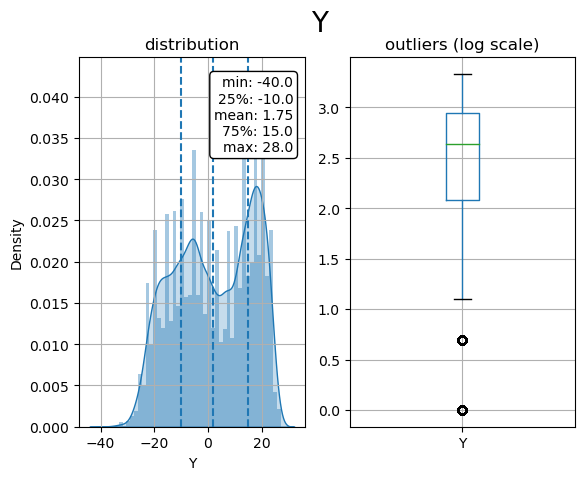

In [7]:
param_result= all_df

param_result= param_result.rename(columns={"No":"Id"})

param_result= param_result.rename(columns={"DEWP":"Y"})

param_result= param_result.set_index('Id')
param_result.head()

x="Y"

fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)

### distribution
ax[0].title.set_text('distribution')
variable = param_result[x].fillna(param_result[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]

sns.distplot(variable, hist=True, kde=True, kde_kws={"fill": True}, ax=ax[0])
des = param_result[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(param_result[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()



In [8]:
# param_result= param_result.loc[param_result["Y"]<500]
param_result.count()

year     41757
month    41757
day      41757
hour     41757
pm2.5    41757
Y        41757
TEMP     41757
PRES     41757
cbwd     41757
Iws      41757
Is       41757
Ir       41757
dtype: int64

D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarni

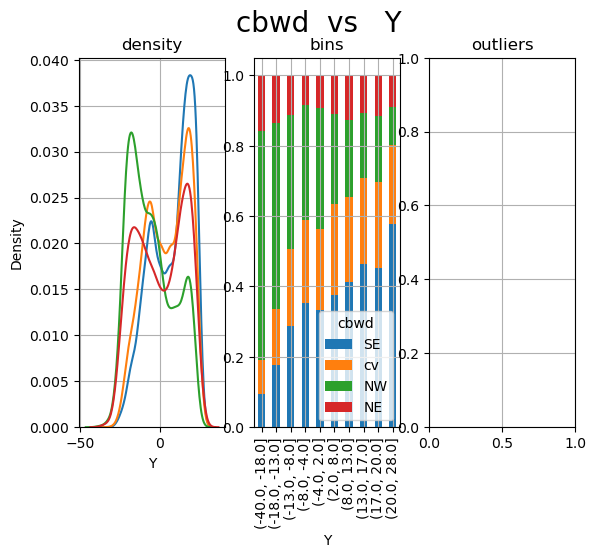

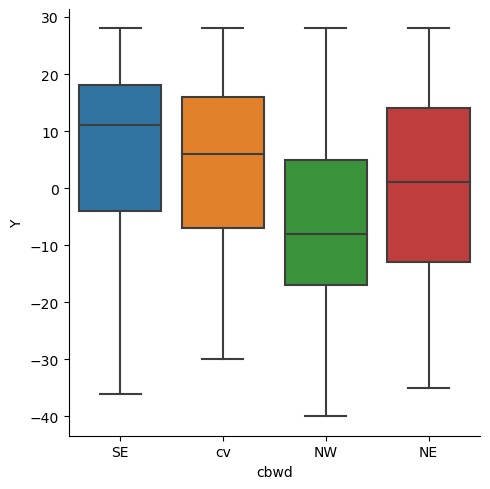

In [9]:
cat, num = "cbwd", 'Y'
fig,ax= plt.subplots(nrows=1,ncols =3,sharex =False, sharey= False)
fig.suptitle(cat+"  vs   "+num, fontsize =20)

#distribution
ax[0].title.set_text('density')
for i in param_result[cat].unique():
    sns.distplot(param_result[param_result[cat]==i][num],hist=False,label=i,ax=ax[0])
ax[0].grid(True)

### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(param_result[num], q=np.linspace(0,1,11))
tmp = param_result.groupby([cat, pd.cut(param_result[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[param_result[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=True, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=param_result, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()


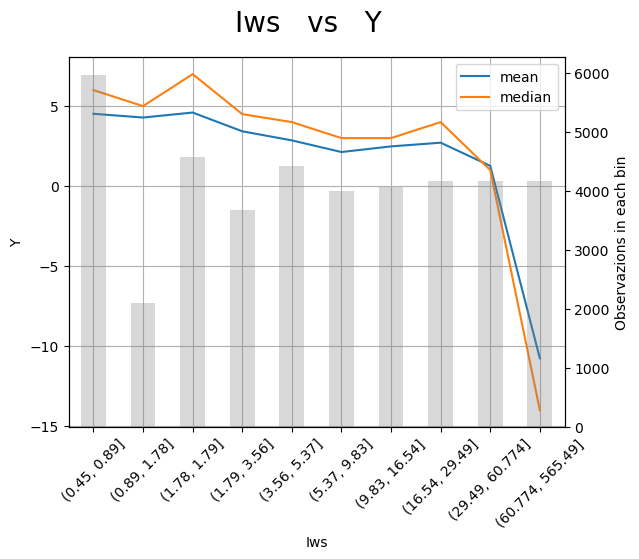

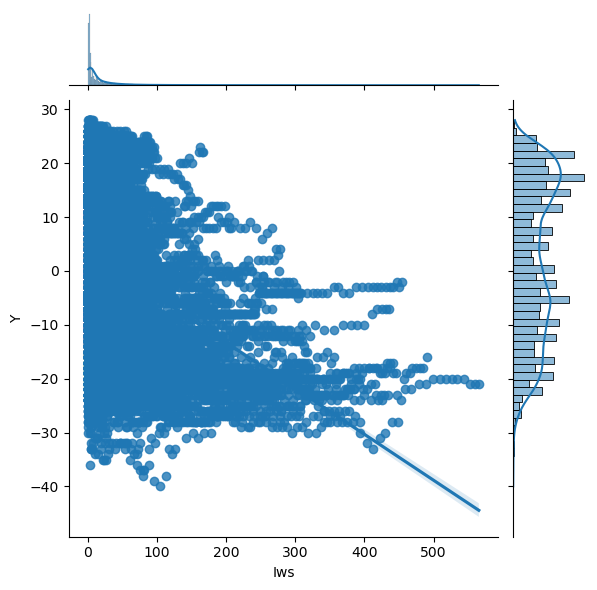

In [10]:
x, y = "Iws", "Y"
### bin plot
dtf_noNan = param_result[param_result[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
plt.show()

In [11]:
x, y = "Iws", "Y"
dtf_noNan = param_result[param_result[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.293 Significant (p-value: 0.0)


In [12]:

NE = param_result.loc[param_result['cbwd'] =="NE"]
# x, y = "Iws", "Y"
# ### bin plot
# dtf_noNan = SE[SE[x].notnull()]
# breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
# groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

# fig, ax = plt.subplots()

# fig.suptitle(x+"   vs   "+y, fontsize=20)
# groups[["mean", "median"]].plot(kind="line", ax=ax)
# groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
# ax.set(ylabel=y)
# ax.right_ax.set_ylabel("Observazions in each bin")
# plt.show()
# ### scatter plot
# sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
# plt.show()

x, y = "Iws", "Y"
dtf_noNan = NE[NE[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.326 Significant (p-value: 0.0)


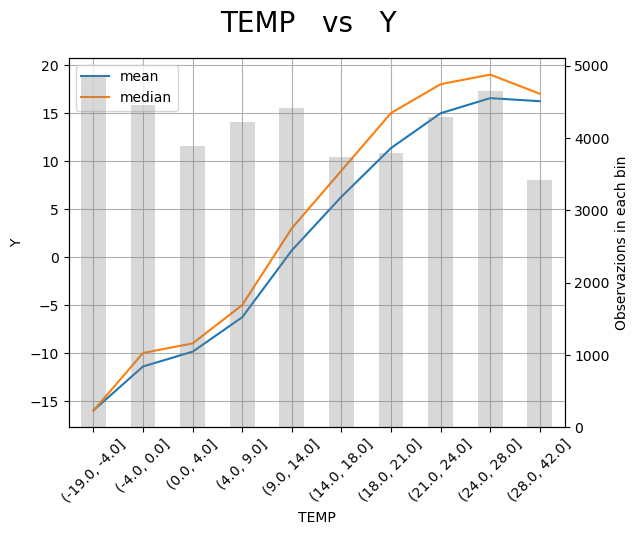

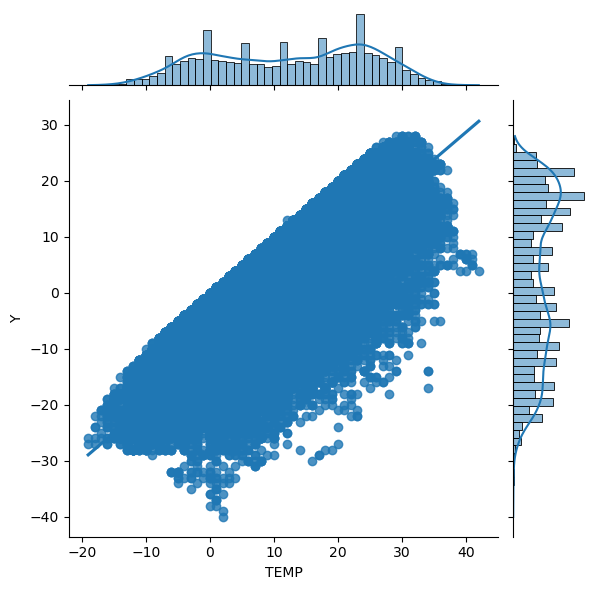

In [13]:
x, y = "TEMP", "Y"
### bin plot
dtf_noNan = param_result[param_result[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
plt.show()


In [14]:
x, y = "TEMP", "Y"
dtf_noNan = param_result[param_result[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.824 Significant (p-value: 0.0)


In [15]:
## split data
param_result= param_result.drop('cbwd',axis=1)
dtf_train, dtf_test = model_selection.train_test_split(param_result, test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (29229, 10) | X_test shape: (12528, 10)
y_train mean: 1.73 | y_test mean: 1.8
11 features: ['year', 'month', 'day', 'hour', 'pm2.5', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


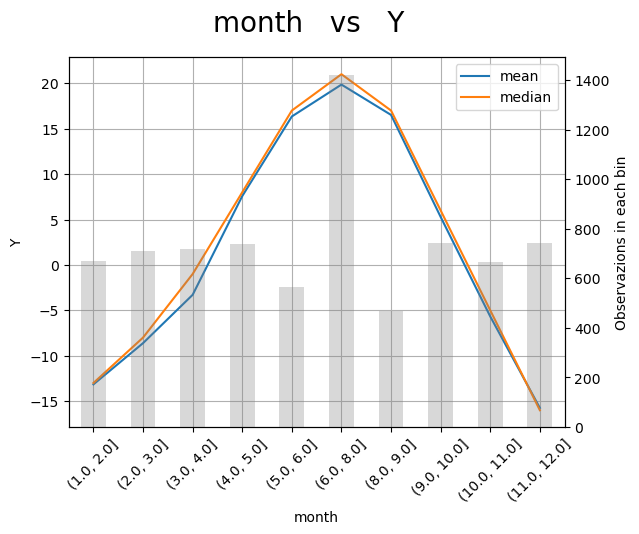

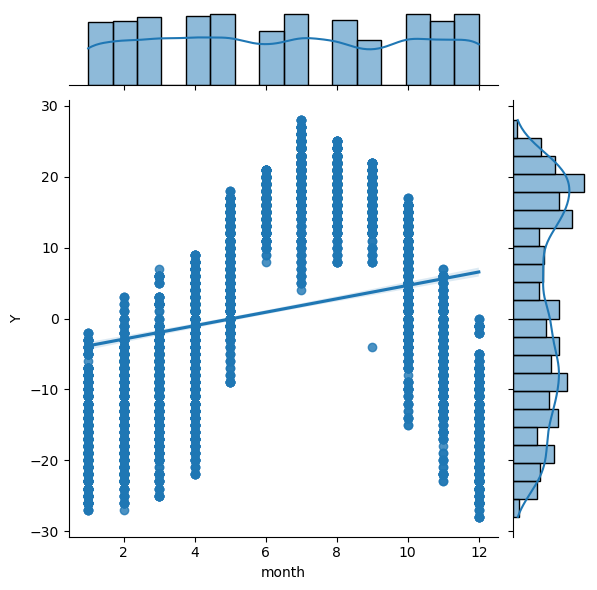

In [16]:


ten = param_result.loc[param_result["year"] == 2010]
x, y = "month", "Y"
## bin plot
dtf_noNan = ten[ten[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=ten, dropna=True, kind='reg' )
plt.show()


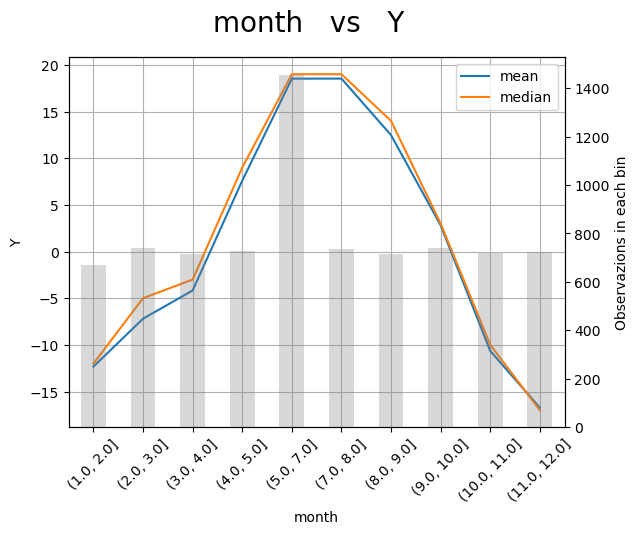

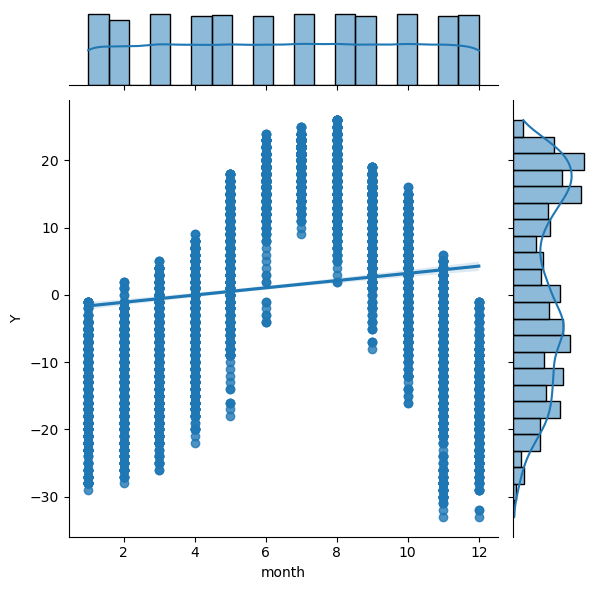

In [17]:
ele = param_result.loc[param_result["year"] == 2013]
x, y = "month", "Y"
## bin plot
dtf_noNan = ele[ele[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=ele, dropna=True, kind='reg' )
plt.show()


Text(0.5, 1.0, 'pearson correlation')

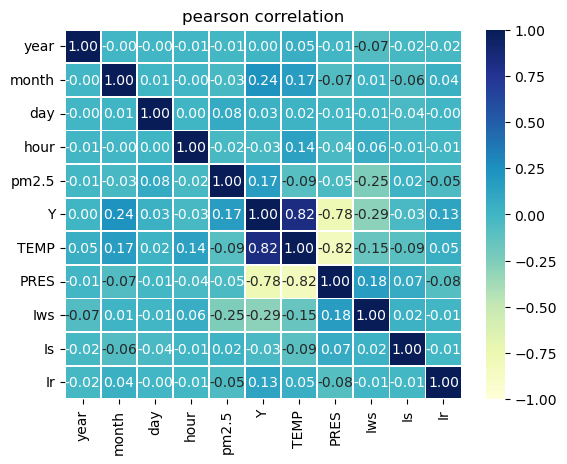

In [18]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

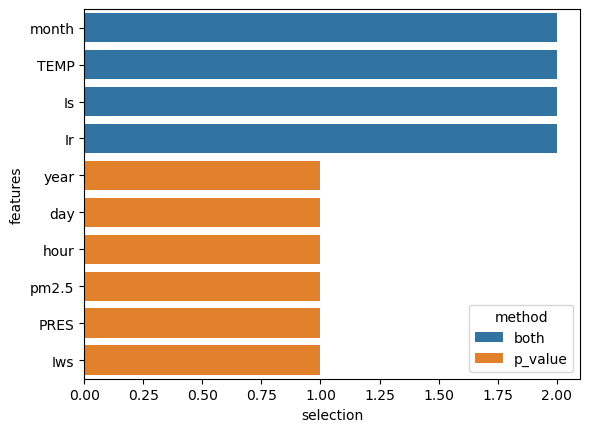

In [19]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

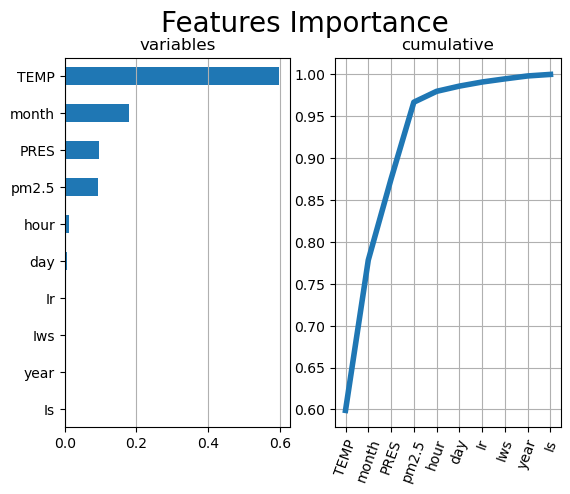

In [20]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

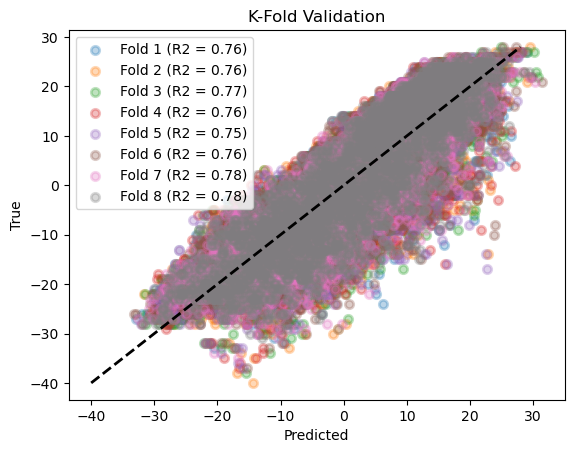

In [21]:
X_names = ['month', 'TEMP', 'PRES', "pm2.5"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=8, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [22]:
# model = linear_model.LogisticRegression(solver='lbfgs',max_iter=100)
# ## K fold validation
# scores = []
# cv = model_selection.KFold(n_splits=8, shuffle=True)
# fig = plt.figure()
# i = 1
# for train, test in cv.split(X_train, y_train):
#     prediction = model.fit(X_train[train],
#                  y_train[train]).predict(X_train[test])
#     true = y_train[test]
#     score = metrics.r2_score(true, prediction)
#     scores.append(score)
#     plt.scatter(prediction, true, lw=2, alpha=0.3,  label='Fold %d (R2 = %0.2f)' % (i,score))
#     i = i+1
# plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
#          linestyle='--', lw=2, color='black')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('K-Fold Validation')
# plt.legend()
# plt.show()

MSE:  47.79657818663616
RMSE:  6.913506938351633


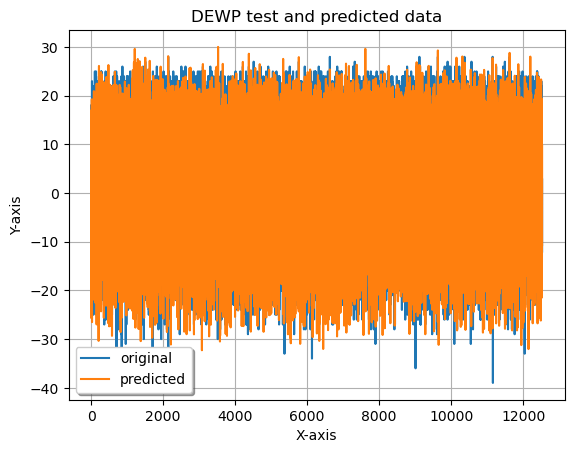

In [23]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predicted, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 

R-squared: 0.9978218728469354
MSE:  27.102416453810136
RMSE:  5.205998122724416


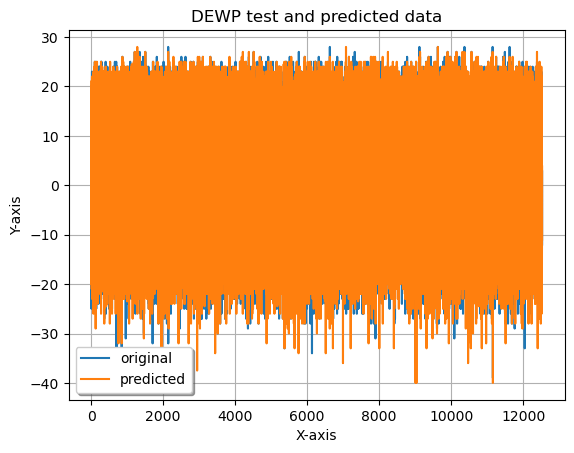

In [24]:
X_names = ['month', 'TEMP', 'pm2.5', "PRES"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 

MSE:  18.488323387671898
RMSE:  4.29980504065846


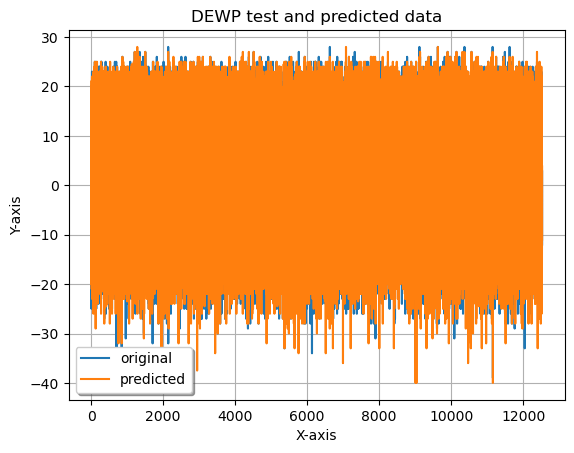

In [25]:
RegModel = svm.SVR()
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

mse = mean_squared_error(y_test, prediction)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 

In [26]:
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Sequential

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[10,50,100]
    epoch_list  =   [10,20]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=4, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=4, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
     
            MAPE = np.mean(np.abs(y_test-model.predict(X_test)))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
1 Parameters: batch_size: 10 - epochs: 10 Accuracy: 83.76261355104037
2 Parameters: batch_size: 10 - epochs: 20 Accuracy: 83.66904674995655
3 Parameters: batch_size: 50 - epochs: 10 Accuracy: 84.19583550874766
4 Parameters: batch_size: 50 - epochs: 20 Accuracy: 84.89392691782373
5 Parameters: batch_size: 100 - epochs: 10 Accuracy: 84.10641304031948
6 Parameters: batch_size: 100 - epochs: 20 Accuracy: 84.05172815477113


MSE:  26.202542358521054
RMSE:  5.118841896222333


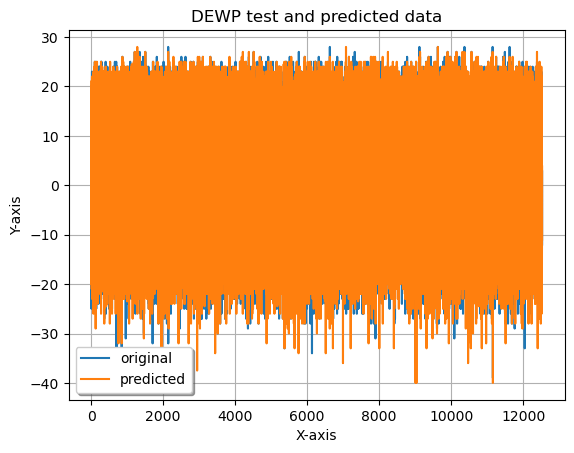

In [32]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=4, input_dim=4, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=4, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
model.fit(X_train, y_train ,batch_size = 10, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
predictions=model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 
 

In [144]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import logging
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [55]:
#read csv file
all_df = pd.read_csv('D:/Machine Learning/PRSA_data_2010.1.1-2014.12.31.csv', index_col=False)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [56]:
# all_df.drop('No',axis=1,inplace=True)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [57]:
all_df.count() # use to compare if the missing data is removed successfully

No       43824
year     43824
month    43824
day      43824
hour     43824
pm2.5    41757
DEWP     43824
TEMP     43824
PRES     43824
cbwd     43824
Iws      43824
Is       43824
Ir       43824
dtype: int64

In [58]:
#remove missing data
all_df.dropna(inplace=True)
all_df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [59]:
all_df.count()

No       41757
year     41757
month    41757
day      41757
hour     41757
pm2.5    41757
DEWP     41757
TEMP     41757
PRES     41757
cbwd     41757
Iws      41757
Is       41757
Ir       41757
dtype: int64

D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

D:\Anaconda\envs\mle_tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\envs\mle_tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


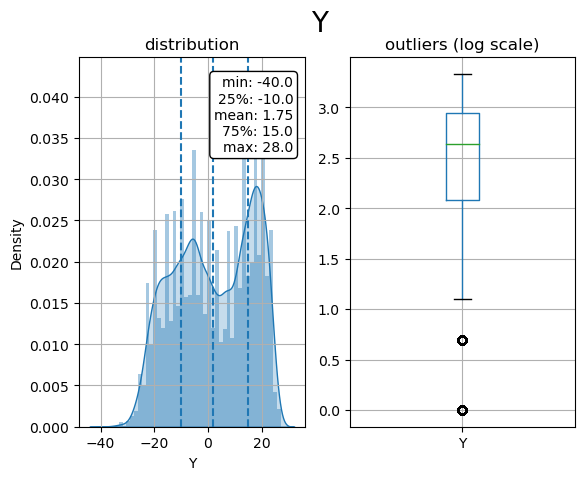

In [119]:
param_result= all_df

param_result= param_result.rename(columns={"No":"Id"})

param_result= param_result.rename(columns={"DEWP":"Y"})

param_result= param_result.set_index('Id')
param_result.head()

x="Y"

fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)

### distribution
ax[0].title.set_text('distribution')
variable = param_result[x].fillna(param_result[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]

sns.distplot(variable, hist=True, kde=True, kde_kws={"fill": True}, ax=ax[0])
des = param_result[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(param_result[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()



In [120]:
# param_result= param_result.loc[param_result["Y"]<500]
param_result.count()

year     41757
month    41757
day      41757
hour     41757
pm2.5    41757
Y        41757
TEMP     41757
PRES     41757
cbwd     41757
Iws      41757
Is       41757
Ir       41757
dtype: int64

D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
D:\Anaconda\envs\mle_tf\lib\site-packages\ipykernel_launcher.py:8: UserWarni

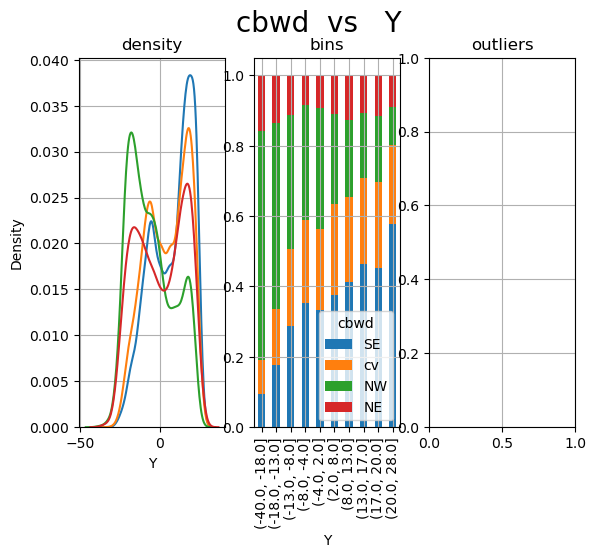

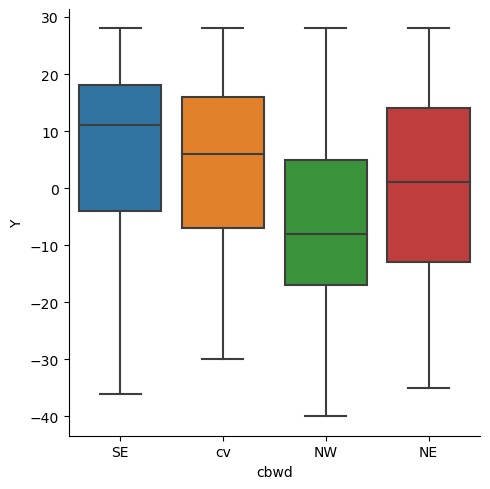

In [121]:
cat, num = "cbwd", 'Y'
fig,ax= plt.subplots(nrows=1,ncols =3,sharex =False, sharey= False)
fig.suptitle(cat+"  vs   "+num, fontsize =20)

#distribution
ax[0].title.set_text('density')
for i in param_result[cat].unique():
    sns.distplot(param_result[param_result[cat]==i][num],hist=False,label=i,ax=ax[0])
ax[0].grid(True)

### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(param_result[num], q=np.linspace(0,1,11))
tmp = param_result.groupby([cat, pd.cut(param_result[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[param_result[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=True, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=param_result, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()


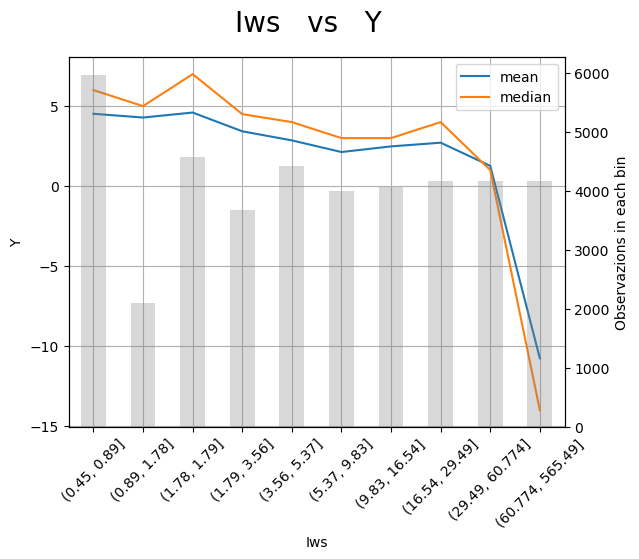

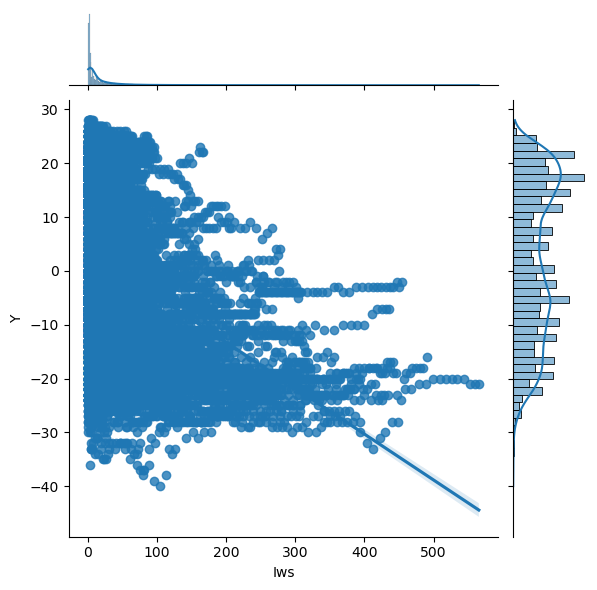

In [122]:
x, y = "Iws", "Y"
### bin plot
dtf_noNan = param_result[param_result[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
plt.show()

In [123]:
x, y = "Iws", "Y"
dtf_noNan = param_result[param_result[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.293 Significant (p-value: 0.0)


In [85]:

NE = param_result.loc[param_result['cbwd'] =="NE"]
# x, y = "Iws", "Y"
# ### bin plot
# dtf_noNan = SE[SE[x].notnull()]
# breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
# groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

# fig, ax = plt.subplots()

# fig.suptitle(x+"   vs   "+y, fontsize=20)
# groups[["mean", "median"]].plot(kind="line", ax=ax)
# groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
# ax.set(ylabel=y)
# ax.right_ax.set_ylabel("Observazions in each bin")
# plt.show()
# ### scatter plot
# sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
# plt.show()

x, y = "Iws", "Y"
dtf_noNan = NE[NE[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: -0.281 Significant (p-value: 0.0)


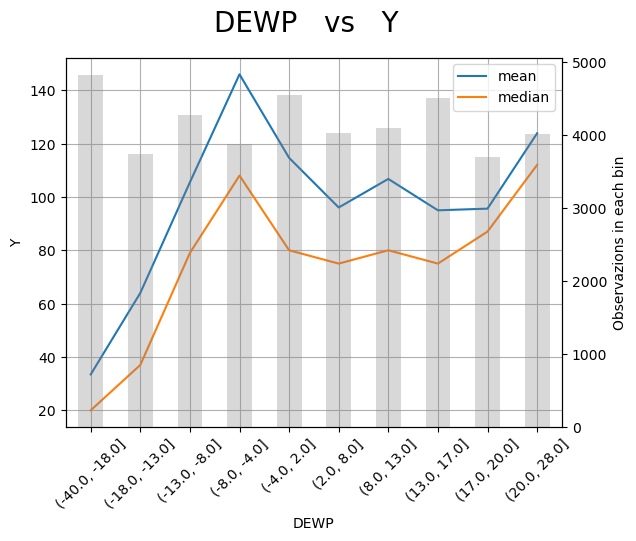

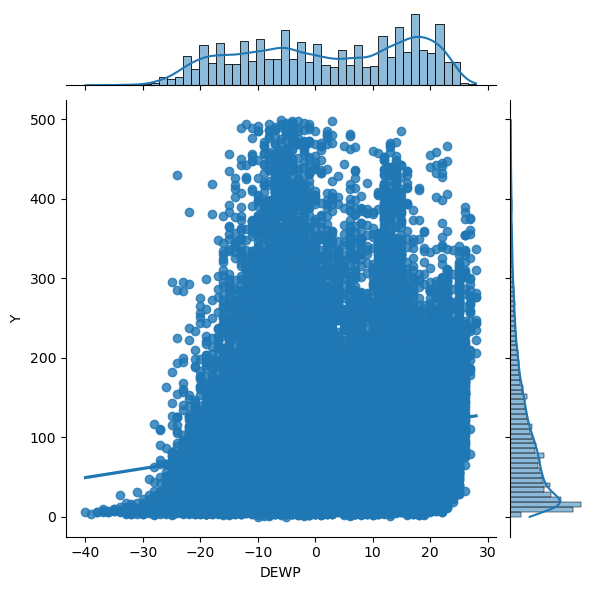

In [98]:
x, y = "DEWP", "Y"
### bin plot
dtf_noNan = param_result[param_result[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
plt.show()

In [99]:
x, y = "DEWP", "Y"
dtf_noNan = param_result[param_result[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.188 Significant (p-value: 0.0)


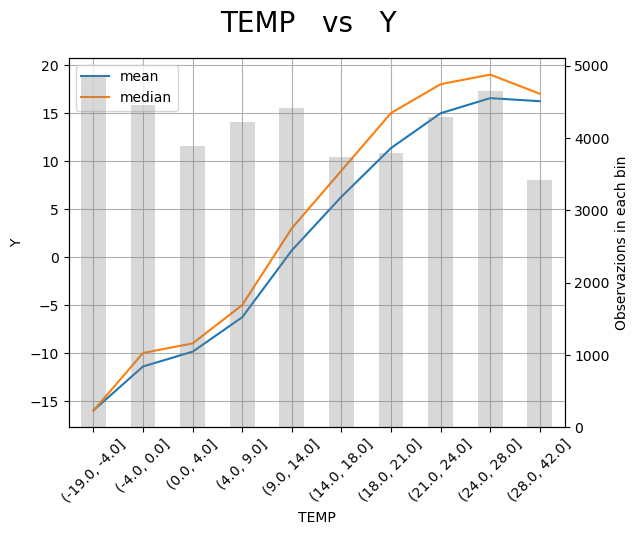

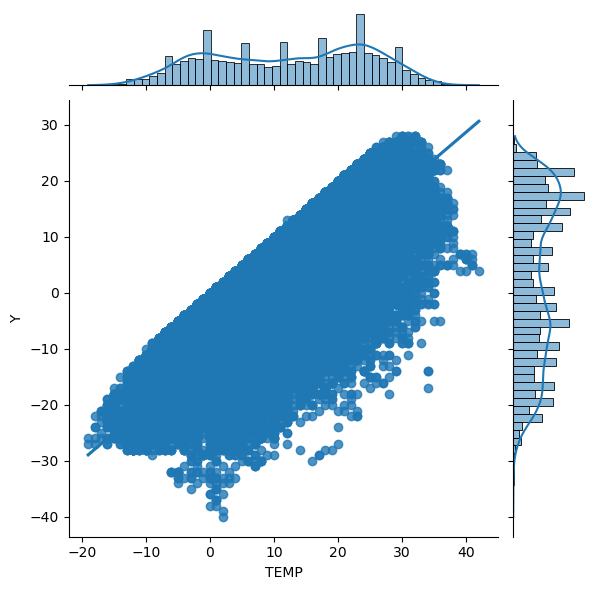

In [124]:
x, y = "TEMP", "Y"
### bin plot
dtf_noNan = param_result[param_result[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=param_result, dropna=True, kind='reg' )
plt.show()


In [129]:
x, y = "TEMP", "Y"
dtf_noNan = param_result[param_result[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.824 Significant (p-value: 0.0)


In [130]:
## split data
param_result= param_result.drop('cbwd',axis=1)
dtf_train, dtf_test = model_selection.train_test_split(param_result, test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (29229, 10) | X_test shape: (12528, 10)
y_train mean: 1.72 | y_test mean: 1.83
11 features: ['year', 'month', 'day', 'hour', 'pm2.5', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']


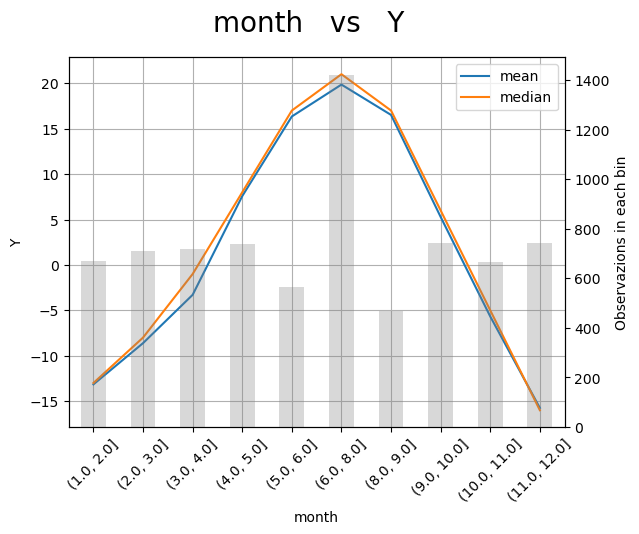

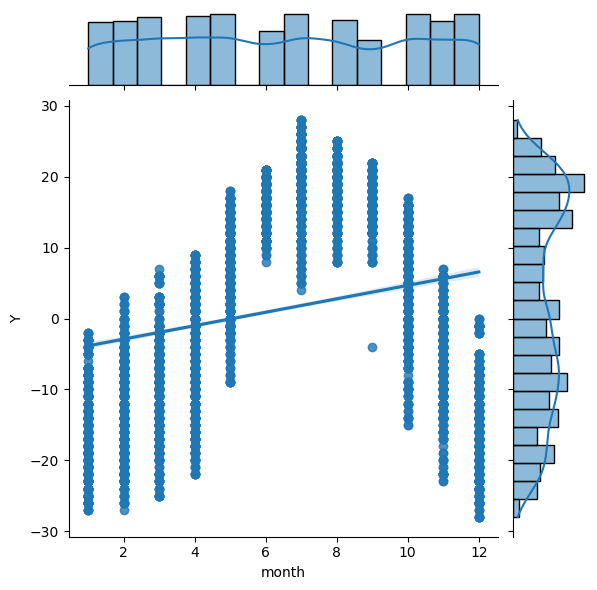

In [131]:


ten = param_result.loc[param_result["year"] == 2010]
x, y = "month", "Y"
## bin plot
dtf_noNan = ten[ten[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=ten, dropna=True, kind='reg' )
plt.show()


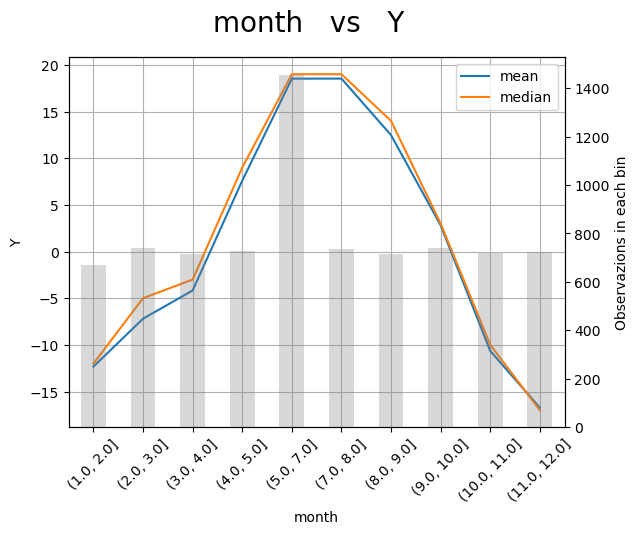

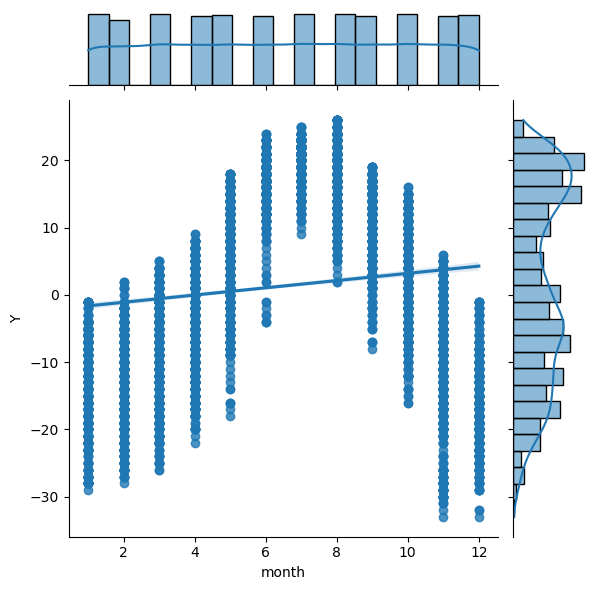

In [126]:
ele = param_result.loc[param_result["year"] == 2013]
x, y = "month", "Y"
## bin plot
dtf_noNan = ele[ele[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks,  duplicates='drop')])[y].agg(['mean','median','size'])

fig, ax = plt.subplots()

fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()
### scatter plot
sns.jointplot(x=x, y=y, data=ele, dropna=True, kind='reg' )
plt.show()


Text(0.5, 1.0, 'pearson correlation')

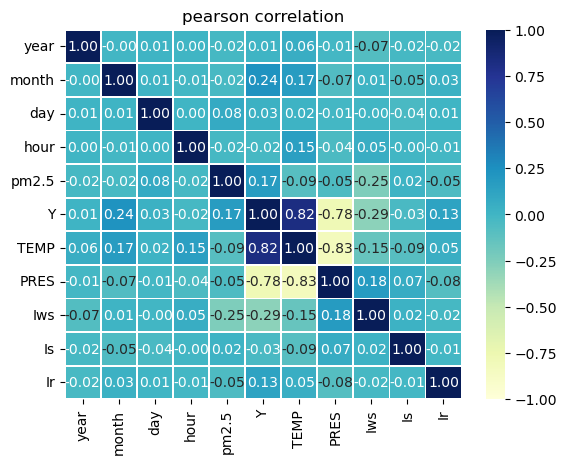

In [132]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

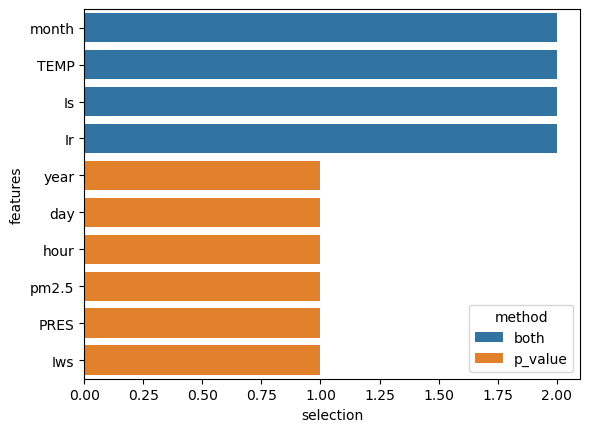

In [133]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

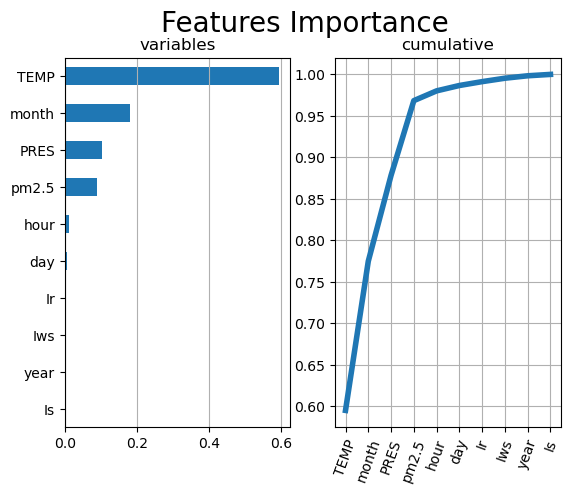

In [151]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

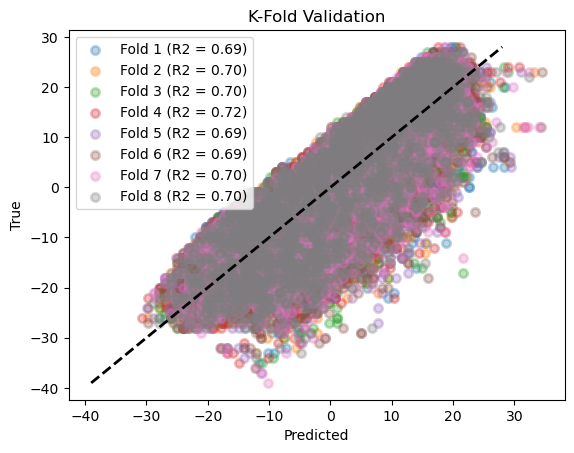

In [152]:
X_names = ['month', 'TEMP', 'Ir', "Is"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=8, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

D:\Anaconda\envs\mle_tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
D:\Anaconda\envs\mle_tf\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

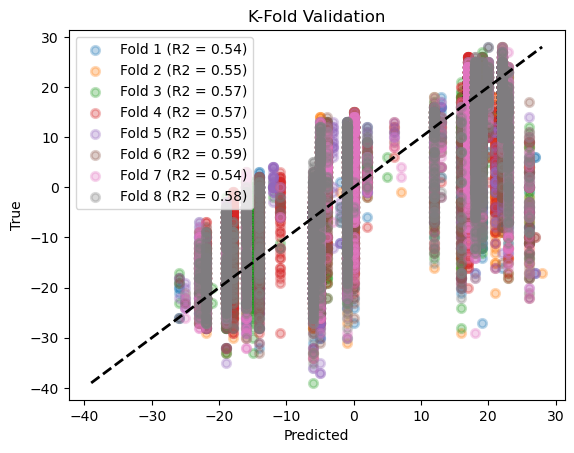

In [136]:
# model = linear_model.LogisticRegression(solver='lbfgs',max_iter=100)
# ## K fold validation
# scores = []
# cv = model_selection.KFold(n_splits=8, shuffle=True)
# fig = plt.figure()
# i = 1
# for train, test in cv.split(X_train, y_train):
#     prediction = model.fit(X_train[train],
#                  y_train[train]).predict(X_train[test])
#     true = y_train[test]
#     score = metrics.r2_score(true, prediction)
#     scores.append(score)
#     plt.scatter(prediction, true, lw=2, alpha=0.3,  label='Fold %d (R2 = %0.2f)' % (i,score))
#     i = i+1
# plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
#          linestyle='--', lw=2, color='black')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('K-Fold Validation')
# plt.legend()
# plt.show()

MSE:  63.19299975479152
RMSE:  7.949402477846466


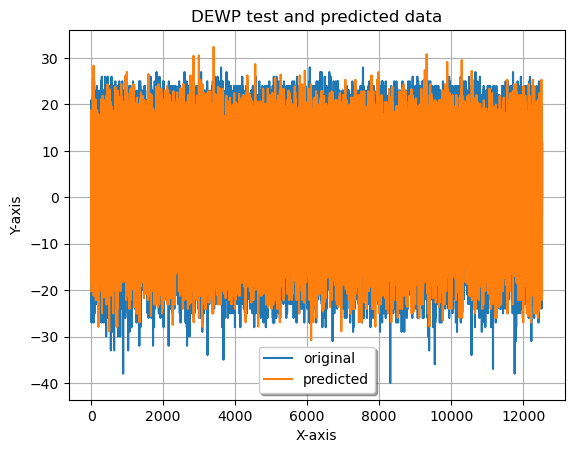

In [154]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predicted, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 

R-squared: 0.837129134265433
MSE:  34.95394057360356
RMSE:  5.912185769544421


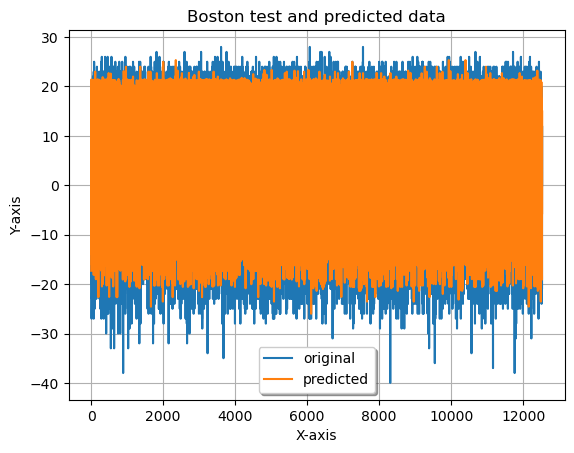

In [147]:
X_names = ['month', 'TEMP', 'Ir', "Is"]
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score)

y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("DEWP test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   
 